## **Task-2: Supervised Machine Learning with Python and Scikit Learn**
In this section we are going to see how linear regression algorithm works by scikit_learn library for Machine Learning.

## Linear Regression ##
Our task is to visualise the relationship between hours fo study and percentage scores obtained.And then to predict the score where study hour is 93.5 hour.This is a simple linear regression task with two variables.
linear regression uses the equation: Y=MX+C, where x is our feature and y is our target variable.

In [73]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [62]:
df = pd.read_csv('Hours_Scores.csv')
print('Importing data')

Importing data


In [5]:
## taking a glance at data
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [21]:
## checking the shape
df.shape

(25, 2)

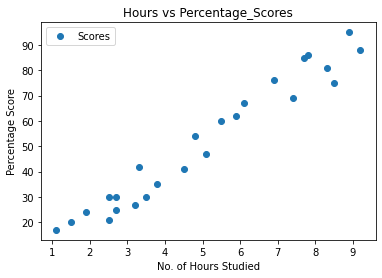

In [27]:
# Plotting the distribution of scores with respect to hours
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage_Scores')  
plt.xlabel('No. of Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

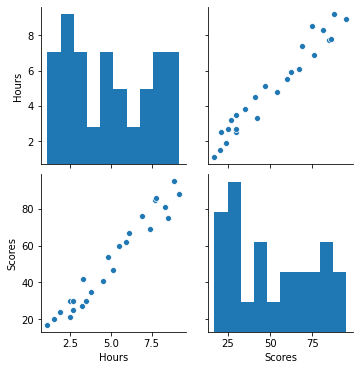

In [10]:
sns.pairplot(df)

Here the hours and scores have linear relationship between them.

<AxesSubplot:xlabel='Scores'>

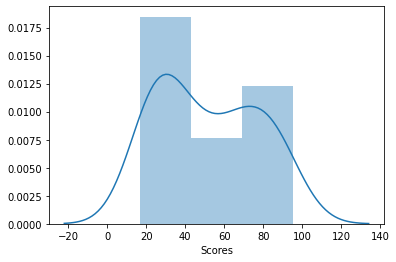

In [11]:
## checking the distribution of scores weather it is guassian or not
sns.distplot(df['Scores'])


The distribution of our scores is not perfect guassian.But as we have less data it will not affect our performance much.Hence, no applying normalization or scaling.

## Preparing the data
The data contains two variables one is our dependent variable(Hour) and other is independent variable or label(Scores). So we will assign them as their designation.

In [29]:
## getting location of feature values and target 
X = df.iloc[:,:-1].values ##all the rows of all columns except the last column as that is our label
y = df.iloc[:,1].values   ##the label column with all of its rows

Now that we have our attributes and labels, the next step is to split this data into training and test sets. 
We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [30]:
## splitting the data into train and test for checking our model
from sklearn.model_selection import train_test_split  
x_train, x_valid, y_train, y_valid = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

## creating and training our model
We have data for training and testing. Now we will first train our linear regression model on train dataset then will test on test dataset.

In [33]:
##importing our model and fitting to the training dataset
from sklearn.linear_model import LinearRegression
lgr = LinearRegression()
lgr.fit(x_train,y_train)
print('Training Completed')

Training Completed


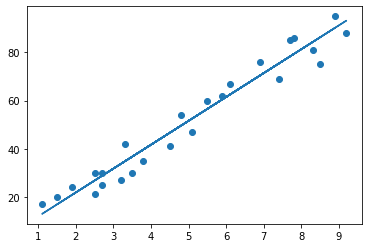

In [45]:
# Plotting the regression line
line = lgr.coef_*X+lgr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Making prediction 

We have trained our model using training dataset. Now we will predict the outputs on test dataset using the trained model.

In [34]:
##testing the model by making prediction on our test dataset
y_prediction = lgr.predict(x_valid)

## Performance Evaluating
We have predicted the outputs on our test dataset. Now is the time to evaluate the performance of our model using r2_score, mean_squared_error and mean_absolute_error.
We will import these metrices from scikit_learn library.

In [54]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
score = r2_score(y_prediction,y_valid)
mse = mean_squared_error(y_prediction,y_valid)
mae = mean_absolute_error(y_prediction,y_valid)

print('r2_score: {}'.format(score))
print('mean_squared_error: {}'.format(mse))
print('Mean Absolute Error:',mae).

r2_score: 0.9546785947197246
mean_squared_error: 21.598769307217456
Mean Absolute Error: 4.183859899002982


We have got the quite good performance using this simple linear regression model.

In [57]:
# Comparing Actual vs Predicted after combining them into a dataframe
df_label = pd.DataFrame({'Actual': y_valid, 'Predicted': y_prediction})  
df_label

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


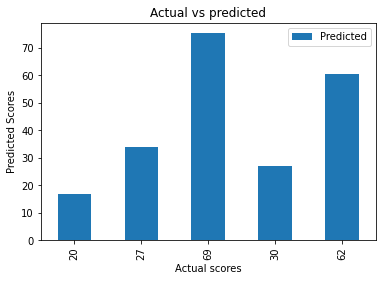

In [66]:
# Plotting the prediction with actual values
df_label.plot(x='Actual', y='Predicted',kind = 'bar')  
plt.title('Actual vs predicted')  
plt.xlabel('Actual scores')  
plt.ylabel('Predicted Scores')  
plt.show()

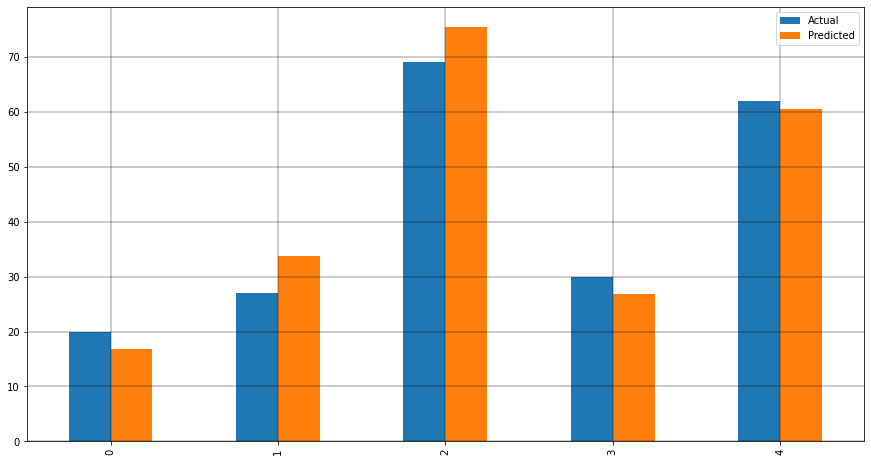

In [71]:
# We can also visualize comparison result as a bar graph
df1 = df_label.head()
df1.plot(kind='bar',figsize=(15,8))
plt.grid(which='major', linestyle='-', linewidth='0.4', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.4', color='black')
plt.show()

<AxesSubplot:>

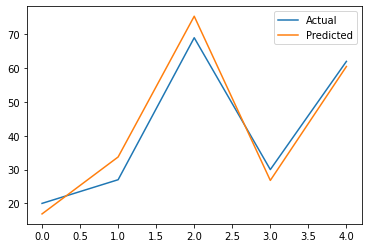

In [60]:
df_label.plot()

## Predicting score 

Now we will be predicting the scores with respect to 9.25 hours of study using our trained model.

In [52]:
hour = [[9.25]]
pred_score = lgr.predict(hour)
print('hour_studied: {}'.format(hour))
print('Score_prediced: {}'.format(pred_score))

hour_studied: [[9.25]]
Score_prediced: [93.69173249]


Finally, our hard work paid off! We have studied for 9.25 hours daily and got a good score of 93.69%.

## THANKS!